In [2]:
from pysus.online_data import SINAN
import pandas as pd

# Importing Brazilian Infecctious disease notification data 

In [3]:
SINAN.list_diseases()

['Animais Peçonhentos',
 'Botulismo',
 'Chagas',
 'Chikungunya',
 'Colera',
 'Coqueluche',
 'Dengue',
 'Difteria',
 'Esquistossomose',
 'Febre Amarela',
 'Febre Maculosa',
 'Febre Tifoide',
 'Hanseniase',
 'Hantavirose',
 'Hepatites Virais',
 'Intoxicação Exógena',
 'Leishmaniose Visceral',
 'Leptospirose',
 'Leishmaniose Tegumentar',
 'Malaria',
 'Meningite',
 'Peste',
 'Poliomielite',
 'Raiva Humana',
 'Tétano Acidental',
 'Tétano Neonatal',
 'Tuberculose',
 'Violência Domestica']

## Mosquito-Borne Diseases
in this notebook we will focus on mosquito borne diseases, available in the public SINAN database, namely `dengue`, `Chikungunya` and `Yellow fever` (febre amarela). We could get malaria data, but Malaria is maily registered on another system, SIVEP-Malaria, which is currently no publicly available. Malaria data in SINAN is incomplete at best.

We start by querying how many years of data is available in the database. For this we have to pick a state, since the data is split by state.

In [4]:
SINAN.get_available_years('RJ', 'dengue')

['DENGRJ13.dbc',
 'DENGRJ14.dbc',
 'DENGRJ15.dbc',
 'DENGRJ16.dbc',
 'DENGRJ17.dbc',
 'DENGRJ18.dbc',
 'DENGRJ19.dbc']

In [5]:
SINAN.get_available_years('RJ', 'Chikungunya')

['CHIKRJ15.dbc',
 'CHIKRJ16.dbc',
 'CHIKRJ17.dbc',
 'CHIKRJ18.dbc',
 'CHIKRJ19.dbc']

In [6]:
SINAN.get_available_years('RJ', 'Febre Amarela')

['FAMARJ07.dbc',
 'FAMARJ08.dbc',
 'FAMARJ09.dbc',
 'FAMARJ10.dbc',
 'FAMARJ11.dbc',
 'FAMARJ12.dbc',
 'FAMARJ13.dbc',
 'FAMARJ14.dbc']

It is very simple to fetch the data.

In [8]:
df = SINAN.download('SP',2018,'Chikungunya')
df

,TP_NOT,ID_AGRAVO,CS_SUSPEIT,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,...,COPAISINF,COMUNINF,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,CS_FLXRET,FLXRECEBI,TP_SISTEMA,TPUNINOT
0,2,A92.,,2018-11-18,201847,2018,35,355220,1353,2018-11-15,...,,,,9,None,2018-11-27,,,2,
1,2,A92.,,2018-05-10,201819,2018,35,354990,1351,2018-05-08,...,,,,,None,None,,,2,
2,2,A92.,,2018-02-12,201807,2018,35,350850,1351,2018-02-01,...,,,,1,None,2018-03-26,,,2,
3,2,A92.,,2018-03-19,201812,2018,35,355220,1353,2018-03-11,...,,,,1,None,2018-04-13,,,2,
4,2,A92.,,2018-12-12,201850,2018,35,355220,1353,2018-09-10,...,,,,,None,None,,,2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,2,A92.,,2018-09-04,201836,2018,35,355030,1331,2018-08-12,...,,,,,None,None,,,2,
3545,2,A92.,,2018-02-05,201806,2018,35,353070,1350,2018-02-05,...,,,,1,None,2018-02-14,,,2,
3546,2,A92.,,2018-04-03,201814,2018,35,353390,1339,2018-03-30,...,,,,1,None,2018-04-18,,,2,
3547,2,A92.,,2018-09-03,201836,2018,35,354140,1346,2018-08-23,...,,,,,None,None,,,2,


As we can see there were 3549 cases of Chikungunya reported in the state of São Paulo, in 2018. If we index our dataframe by the date of first symptoms, we can then plot the series.

In [24]:
df['date'] = pd.to_datetime(df.DT_SIN_PRI)
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3549 entries, 1944-10-17 to 2018-12-28
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TP_NOT      3549 non-null   object
 1   ID_AGRAVO   3549 non-null   object
 2   CS_SUSPEIT  3549 non-null   object
 3   DT_NOTIFIC  3549 non-null   object
 4   SEM_NOT     3549 non-null   object
 5   NU_ANO      3549 non-null   object
 6   SG_UF_NOT   3549 non-null   object
 7   ID_MUNICIP  3549 non-null   object
 8   ID_REGIONA  3549 non-null   object
 9   DT_SIN_PRI  3549 non-null   object
 10  SEM_PRI     3549 non-null   object
 11  NU_IDADE_N  3549 non-null   int64 
 12  CS_SEXO     3549 non-null   object
 13  CS_GESTANT  3549 non-null   object
 14  CS_RACA     3549 non-null   object
 15  CS_ESCOL_N  3549 non-null   object
 16  SG_UF       3549 non-null   object
 17  ID_MN_RESI  3549 non-null   object
 18  ID_RG_RESI  3549 non-null   object
 19  ID_PAIS     3549 non-null   ob

<AxesSubplot:xlabel='date'>

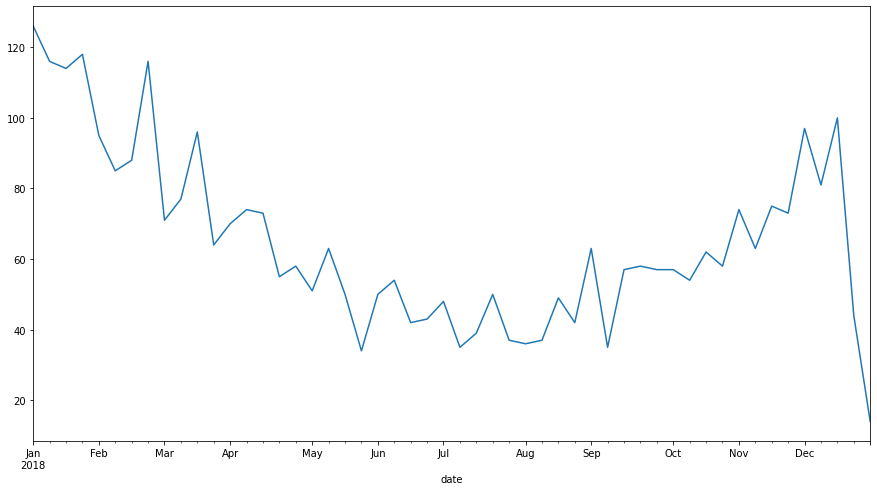

In [29]:
df['2018-01-01':].resample('W').count().ID_AGRAVO.plot(figsize=(15,8));

As expected with other mosquito-borne diseases, incidence is higher in the summer. The sudden drop at the end is due to the the cases with first symptoms in the second half of december, where reported in 2019.